In [1]:
import os
from pathlib import Path

# 取得當前工作目錄
current = Path(os.getcwd())

# 檢查當前目錄的父目錄名稱並執行相應操作
if current.name == 'Notebooks':
    print(f"Current Path: {current}")
elif current.name == 'test_notebooks' or current.name == 'AOI':
    # 切換到上層目錄
    os.chdir('../')
    # 更新 current 變量為新的工作目錄
    current = Path(os.getcwd())
    print(f"Updated Path: {current}")
else:
    print("No matching parent directory found.")
    
import cv2  # 用於讀取圖片
import numpy as np  # 用於數學運算
import matplotlib.pyplot as plt  # 用於圖形顯示
import pathlib

from mymodules.filter.basic_filters import get_lines_hough, equalized_image, image_binary, crop

Updated Path: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Notebooks


In [2]:
import datetime
now = datetime.datetime.now()
f"{now.date()}"

folder_path = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/outputs/pdf")
folder_path = folder_path / f"{now.date()}"
folder_path.mkdir(parents=True, exist_ok=True) # 確保目錄存在，不存在則創建
folder_path.as_posix()

template_folder_path = folder_path / 'template'
template_folder_path.mkdir(parents=True, exist_ok=True)

import os
origin_image_folder = pathlib.Path(r"/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_202401021_AUO")
origin_images = os.listdir(origin_image_folder.as_posix())
origin_images = [image for image in sorted(origin_images) if image[-4:]==".tif"]
origin_images

['6_1.tif']

Image changed to Blue channel


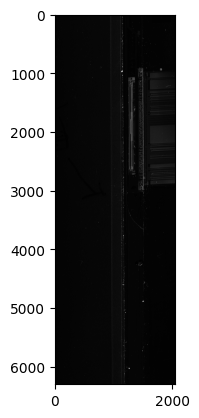

In [3]:
image_number = 0
origin_image_path = origin_image_folder / origin_images[image_number]
origin_name = origin_image_path.name

from mymodules.image_manager import ImageManager

origin_im = ImageManager(origin_image_path.as_posix())
origin_im.choose_rgb('b')

origin_im.show()

In [4]:
origin_im.path

PosixPath('/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_202401021_AUO/6_1.tif')

In [5]:
crop_params={'x1':1000,'x2': 1600, 'y1':0, 'y2':6299}

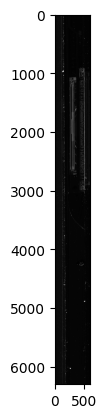

Name: crop.tif
Folder: /Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/Code/Resources/Data/Exp_202401021_AUO
Type:  <class 'numpy.ndarray'>
Shape:  (6299, 600)
Max:  255
Min:  0
Mean:  10.79676483039636
Standard Deviation:  14.104116592079992


In [6]:
origin_im = origin_im.process(crop, params=crop_params) # 9
origin_im.show()
origin_im.basic_array_info()

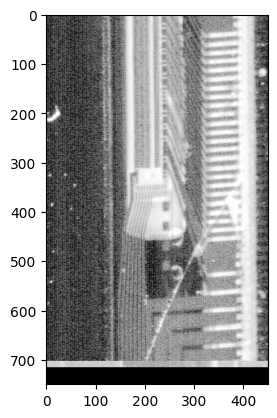

In [31]:
e_im = origin_im.process(equalized_image)
e_im.show()

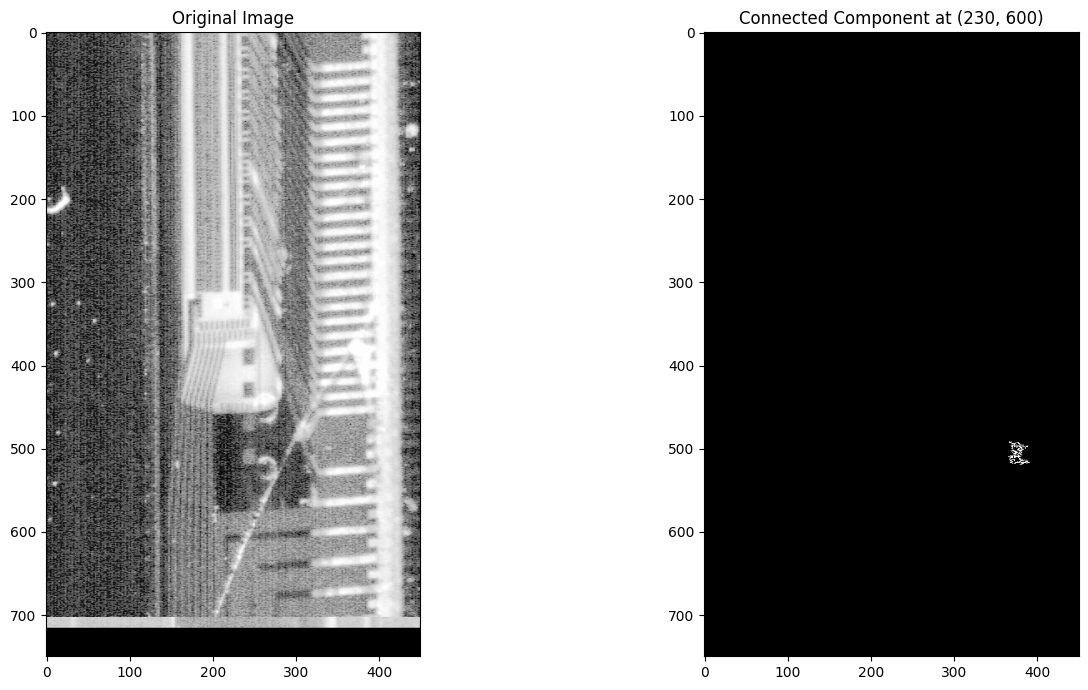

In [40]:
image_gray = e_im.image 

# 確保指定的點 (230, 600) 在圖像範圍內
start_row, start_col = 500, 380

# 獲取 (230, 600) 位置的像素值
target_value = image_gray[start_row, start_col]

# 創建一個二值化圖像，將目標值設置為白色，其它設置為黑色
binary = np.zeros_like(image_gray, dtype=np.uint8)
binary[image_gray == target_value] = 255

# 查找連通組件，並提取與 (230, 600) 相連的物件
num_labels, labels = cv2.connectedComponents(binary)

# 獲取 (230, 600) 位置的標籤
target_label = labels[start_row, start_col]

# 創建一個圖像來顯示只包含與 (230, 600) 位置相連的物件
connected_component = np.zeros_like(image_gray, dtype=np.uint8)
connected_component[labels == target_label] = 255

# 顯示原始圖像和提取結果
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image_gray, cmap='gray')

plt.subplot(1, 2, 2)
plt.title("Connected Component at (230, 600)")
plt.imshow(connected_component, cmap='gray')

plt.tight_layout()
plt.show()


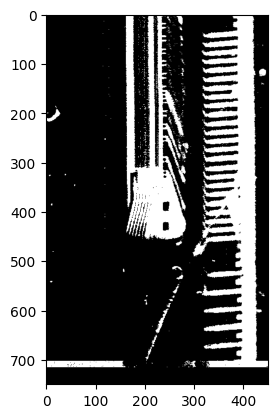

In [7]:
b_im = origin_im.process(image_binary, params={'threshold_value':8})
b_im.show()

In [7]:
r_origin_im = ImageManager(origin_image_path.as_posix())
r_origin_im.choose_rgb('r')
r_origin_im = r_origin_im.process(crop, params=crop_params) # 9

Image changed to Red channel


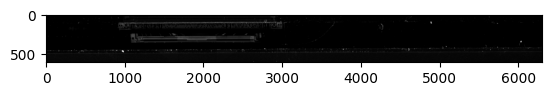

In [8]:
image = origin_im.image.astype(np.float16) - r_origin_im.image.astype(np.float16)*1
image = np.rot90(image)
image = np.clip(image, 0, 255)
plt.imshow(image, cmap='gray')

In [8]:
image = e_im.image

In [9]:
image = origin_im.image

In [10]:
image = b_im.image

In [11]:
colors = [
    [255, 0, 0],       # 紅色
    [0, 255, 0],       # 綠色
    [0, 0, 255],       # 藍色
    [255, 255, 0],     # 黃色
    [0, 255, 255],     # 青色
    [255, 0, 255],     # 紫色
    [255, 255, 255],   # 白色
    [128, 0, 0],       # 栗色
    [128, 128, 0],     # 橄欖色
    [0, 128, 0],       # 深綠色
    [128, 0, 128],     # 深紫色
    [0, 128, 128],     # 藍綠色
    [0, 0, 128],       # 海軍藍
    [192, 192, 192],   # 銀色
    [128, 128, 128],   # 灰色
    [255, 165, 0],     # 橙色
    [255, 105, 180],   # 熱粉色
    [75, 0, 130],      # 靛青色
    [173, 255, 47]     # 綠黃色
]

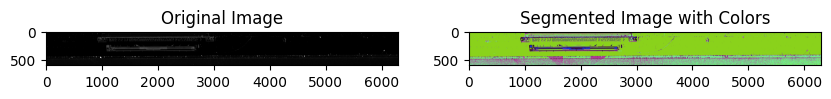

In [9]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 假設原始圖片已經是一個 NumPy 陣列
# 將圖片轉換為二維數組，KMeans 需要一維數據
pixel_values = image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# 定義要分的群數 (例如分成 10 群)
num_clusters = 10

# 使用 KMeans 進行分群
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(pixel_values)

# 獲取每個像素的分群標籤
labels = kmeans.labels_

# 創建一個與圖片相同形狀的陣列來保存每個像素的顏色
segmented_image = labels.reshape(image.shape)

# 獲取唯一的分群標籤 (有時可能會少於 num_clusters)
unique_labels = np.unique(labels)

# 隨機生成顏色，確保有足夠多的顏色
colors = np.random.randint(0, 256, size=(num_clusters, 3), dtype=np.uint8)

# 創建有顏色的分群結果
colored_segmented_image = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3), dtype=np.uint8)

# 將每個分群標籤對應的像素設置成相應顏色
for idx, label in enumerate(unique_labels):
    colored_segmented_image[segmented_image == label] = colors[label]

# 顯示原始圖片和分群結果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Segmented Image with Colors")
plt.imshow(colored_segmented_image)
plt.show()


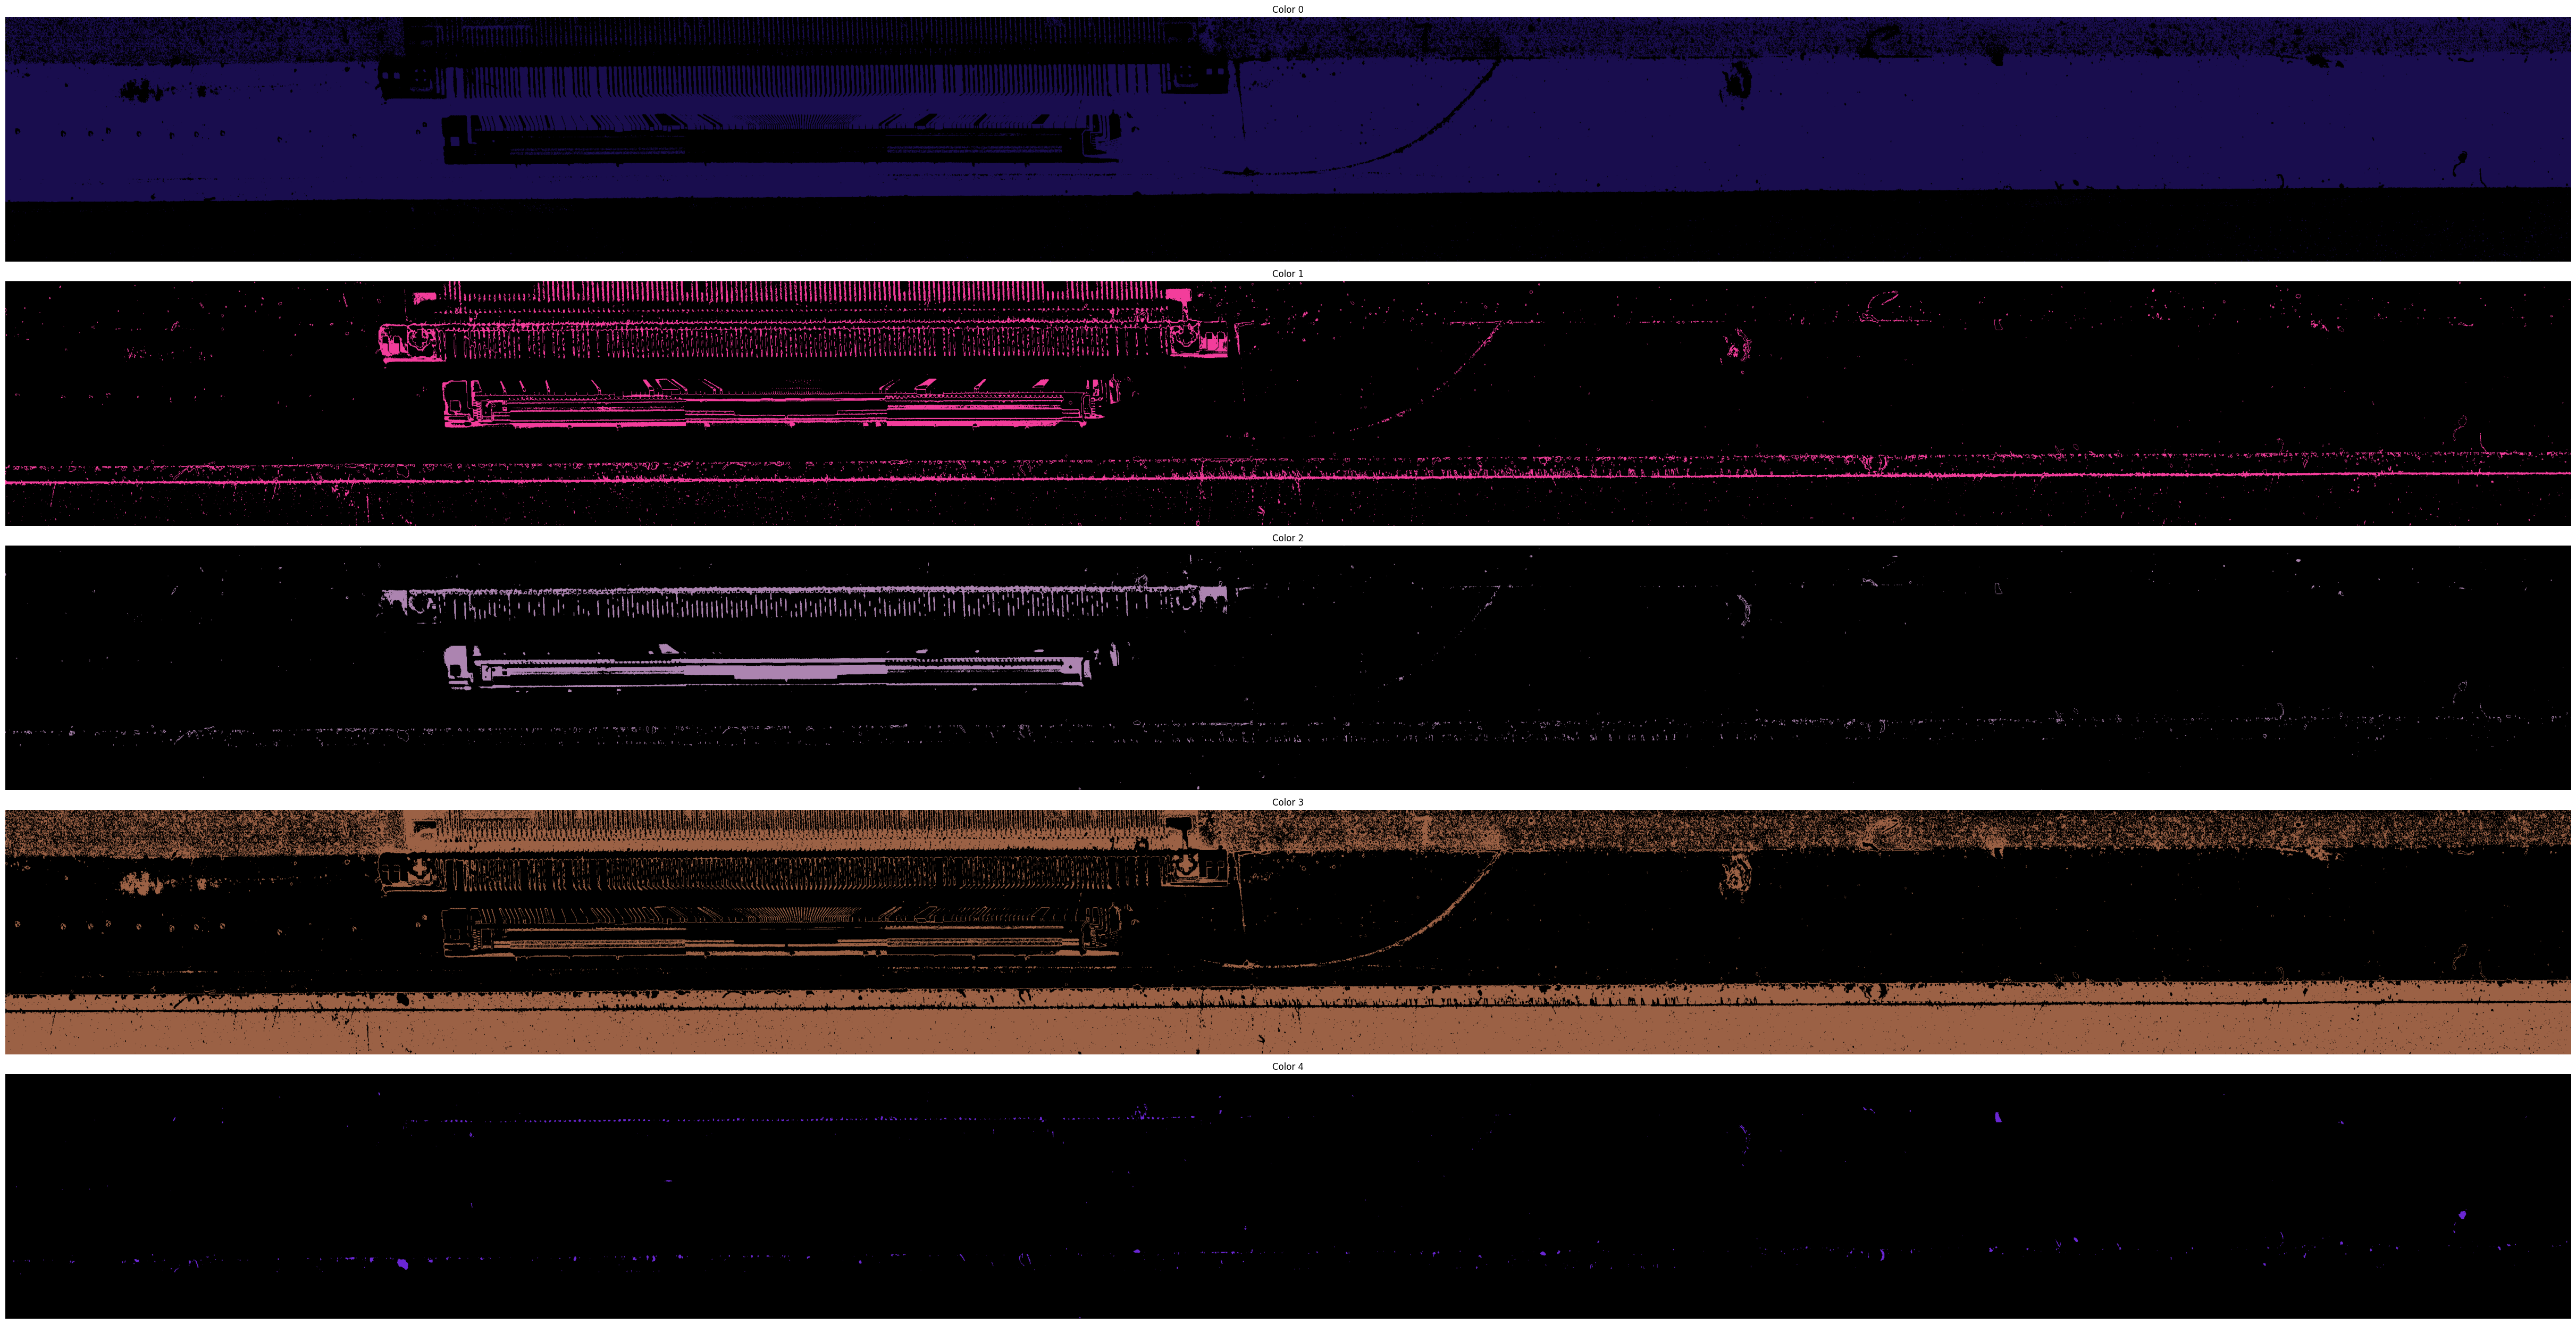

In [22]:
# 設置每一行的列數和總行數
num_colors = len(colors)
columns = 1  # 每行的列數
rows = (num_colors + columns - 1) // columns  # 確保所有顏色都能顯示

# 創建子圖
fig, axes = plt.subplots(rows, columns, figsize=(50, 5 * rows))
axes = axes.flatten()

# 顯示每個顏色提取的結果
for i in range(num_colors):
    target_color_segment = np.zeros_like(colored_segmented_image)
    target_color_segment[segmented_image == unique_labels[i]] = colors[i]
    axes[i].imshow(target_color_segment)
    axes[i].set_title(f"Color {i}")
    axes[i].axis('off')

# 隱藏多餘的子圖（如果總顏色數量不是子圖總數）
for j in range(num_colors, len(axes)):
    axes[j].axis('off')

# 顯示所有結果
plt.tight_layout()
plt.show()

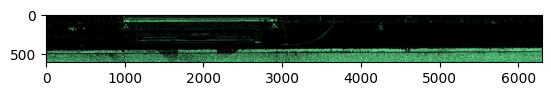

In [17]:
# 提取特定顏色 (例如 color[3]，黃色)
target_color_index = 7  # color[3] 表示黃色
target_color_segment = np.zeros_like(colored_segmented_image)

# 將對應標籤設置為原來的顏色，其他地方保持黑色
target_color_segment[segmented_image == unique_labels[target_color_index]] = colors[target_color_index]
plt.imshow(target_color_segment)

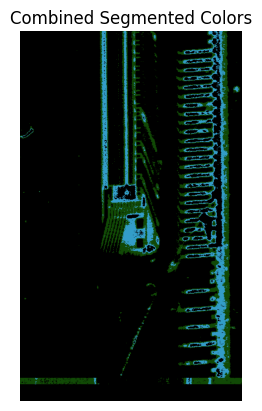

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# 假設 colored_segmented_image 已經存在，且包含分割後的 RGB 圖像

# 提取特定顏色 (例如 color[3]，黃色)
target_color_index = 2  # 例如黃色對應的索引
target_color_segment = np.zeros_like(colored_segmented_image)

# 將對應標籤設置為原來的顏色，其他地方保持黑色
target_color_segment[segmented_image == unique_labels[target_color_index]] = colors[target_color_index]

# 提取另一個顏色 (例如 color[5])
target_color_index_2 = 4  # 例如另一個顏色對應的索引
target_color_segment_2 = np.zeros_like(colored_segmented_image)

# 將對應標籤設置為原來的顏色，其他地方保持黑色
target_color_segment_2[segmented_image == unique_labels[target_color_index_2]] = colors[target_color_index_2]

# 合併兩個顏色的結果，並確保像素值在 0 到 255 之間
combined_segment = np.clip(target_color_segment + target_color_segment_2, 0, 255)

# 顯示結果
plt.imshow(combined_segment)
plt.title("Combined Segmented Colors")
plt.axis('off')
plt.show()


In [30]:
be_im = e_im.process(image_binary, compare=True, params={'threshold_value':200})
image = be_im.image

NameError: name 'e_im' is not defined

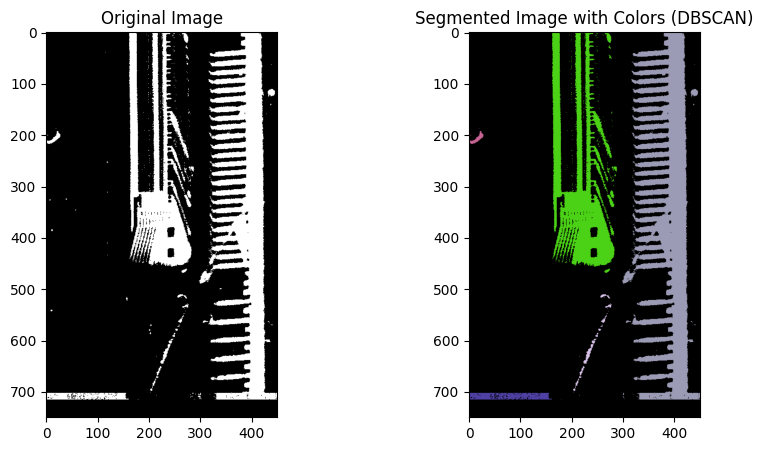

In [26]:
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 假設原始圖片已經是一個 NumPy 陣列 (image 是圖片的 numpy 陣列)
# 將圖片轉換為二維數組，DBSCAN 需要二維數據
pixel_values = image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# 標準化數據以更好地使用 DBSCAN（DBSCAN 對於不同尺度的數據非常敏感）
scaler = StandardScaler()
pixel_values_scaled = scaler.fit_transform(pixel_values)

# 獲取非零像素的座標 (使用原始圖像的非零像素，保證不漏掉有效區域)
coords = np.column_stack(np.where(image > 0))  # 這裡使用原圖，或根據需要進行修改

# 使用 DBSCAN 進行分群
# eps 表示兩點之間的最大距離以被認為是同一個群，min_samples 是形成一個群所需的最小點數
dbscan = DBSCAN(eps=20, min_samples=50)
labels = dbscan.fit_predict(coords)

# 創建一個與原始圖片大小相同的陣列，初始化為 -1（表示噪聲）
segmented_image = -1 * np.ones(image.shape, dtype=int)

# 用 DBSCAN 的結果填充 segmented_image 中的相應位置
for i, coord in enumerate(coords):
    segmented_image[coord[0], coord[1]] = labels[i]

# 將分群的標籤轉換為顏色值，讓每個群組對應不同顏色
unique_labels = np.unique(labels)
colored_segmented_image = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3), dtype=np.uint8)

# 定義顏色（可以根據群組數量隨機選擇顏色）
colors = np.random.randint(0, 256, size=(len(unique_labels), 3), dtype=np.uint8)

# 將每個分群標籤對應的像素設置成相應顏色，-1 標籤的像素是噪聲，設置成黑色
for idx, label in enumerate(unique_labels):
    if label == -1:
        colored_segmented_image[segmented_image == label] = [0, 0, 0]  # 噪聲點顯示為黑色
    else:
        colored_segmented_image[segmented_image == label] = colors[idx]

# 顯示原始圖片和分群結果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Segmented Image with Colors (DBSCAN)")
plt.imshow(colored_segmented_image)
plt.show()


In [6]:
image = origin_im.image

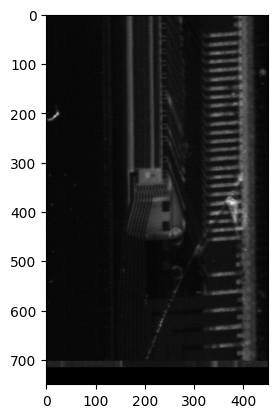

In [20]:
image = origin_im.image*3
plt.imshow(image, cmap='gray')

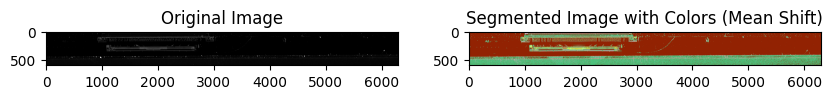

In [18]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# 假設原始圖片是一個灰階圖像
# 將圖片轉換為二維數組，Mean Shift 需要一維數據
pixel_values = image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# 計算合適的帶寬參數
bandwidth = estimate_bandwidth(pixel_values, quantile=0.1, n_samples=500)

# 使用 Mean Shift 進行分群
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = mean_shift.fit_predict(pixel_values)

# 創建一個與圖片相同形狀的陣列來保存每個像素的顏色
segmented_image = labels.reshape(image.shape)

# 獲取唯一的分群標籤
unique_labels = np.unique(labels)

# 隨機生成顏色，確保有足夠多的顏色
colors = np.random.randint(0, 256, size=(len(unique_labels), 3), dtype=np.uint8)

# 創建有顏色的分群結果
colored_segmented_image = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3), dtype=np.uint8)

# 將每個分群標籤對應的像素設置成相應顏色
for idx, label in enumerate(unique_labels):
    colored_segmented_image[segmented_image == label] = colors[idx]

# 顯示原始圖片和分群結果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Segmented Image with Colors (Mean Shift)")
plt.imshow(colored_segmented_image)
plt.show()


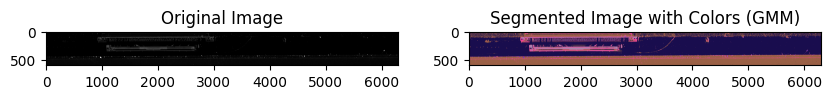

In [21]:
import numpy as np
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# 假設原始圖片是一個灰階圖像
# 將圖片轉換為二維數組，GMM 需要一維數據
pixel_values = image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# 定義要分的群數 (例如分成 5 群)
num_clusters = 5

# 使用 GMM 進行分群
gmm = GaussianMixture(n_components=num_clusters, random_state=42)
gmm.fit(pixel_values)
labels = gmm.predict(pixel_values)

# 創建一個與圖片相同形狀的陣列來保存每個像素的顏色
segmented_image = labels.reshape(image.shape)

# 獲取唯一的分群標籤
unique_labels = np.unique(labels)

# 隨機生成顏色，確保有足夠多的顏色
colors = np.random.randint(0, 256, size=(num_clusters, 3), dtype=np.uint8)

# 創建有顏色的分群結果
colored_segmented_image = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3), dtype=np.uint8)

# 將每個分群標籤對應的像素設置成相應顏色
for idx, label in enumerate(unique_labels):
    colored_segmented_image[segmented_image == label] = colors[label]

# 顯示原始圖片和分群結果
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Segmented Image with Colors (GMM)")
plt.imshow(colored_segmented_image)
plt.show()


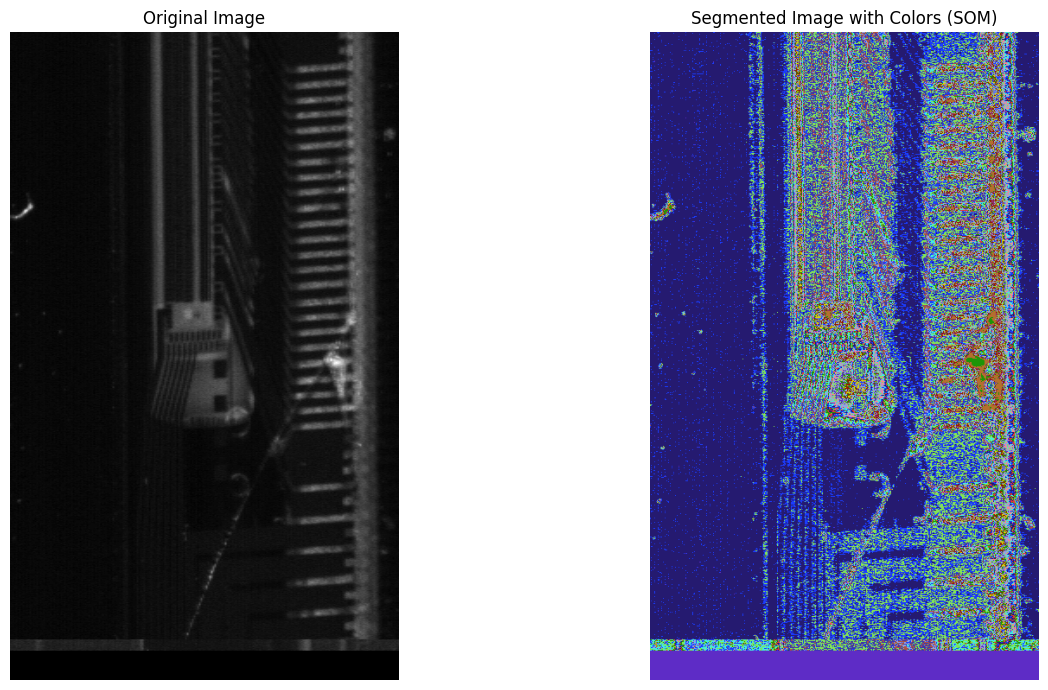

In [9]:
import numpy as np
from minisom import MiniSom
import matplotlib.pyplot as plt

# 假設原始圖片是一個灰階圖像，將圖片轉換為一維數組
pixel_values = image.reshape((-1, 1))
pixel_values = np.float32(pixel_values)

# 定義 SOM 網格的大小
som_size = 20
som = MiniSom(som_size, som_size, 1, sigma=0.5, learning_rate=0.5)

# 初始化 SOM 並訓練
som.random_weights_init(pixel_values)
som.train_random(pixel_values, 100)

# 使用 SOM 找到每個像素的分群標籤
labels = np.array([som.winner(x)[0] for x in pixel_values])

# 將分群結果重塑為圖像形狀
segmented_image = labels.reshape(image.shape)

# 創建顏色映射結果
unique_labels = np.unique(labels)
colors = np.random.randint(0, 256, size=(len(unique_labels), 3), dtype=np.uint8)

colored_segmented_image = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3), dtype=np.uint8)
for idx, label in enumerate(unique_labels):
    colored_segmented_image[segmented_image == label] = colors[idx]

# 顯示原始圖片和分群結果
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Segmented Image with Colors (SOM)")
plt.imshow(colored_segmented_image)
plt.axis('off')
plt.tight_layout()
plt.show()


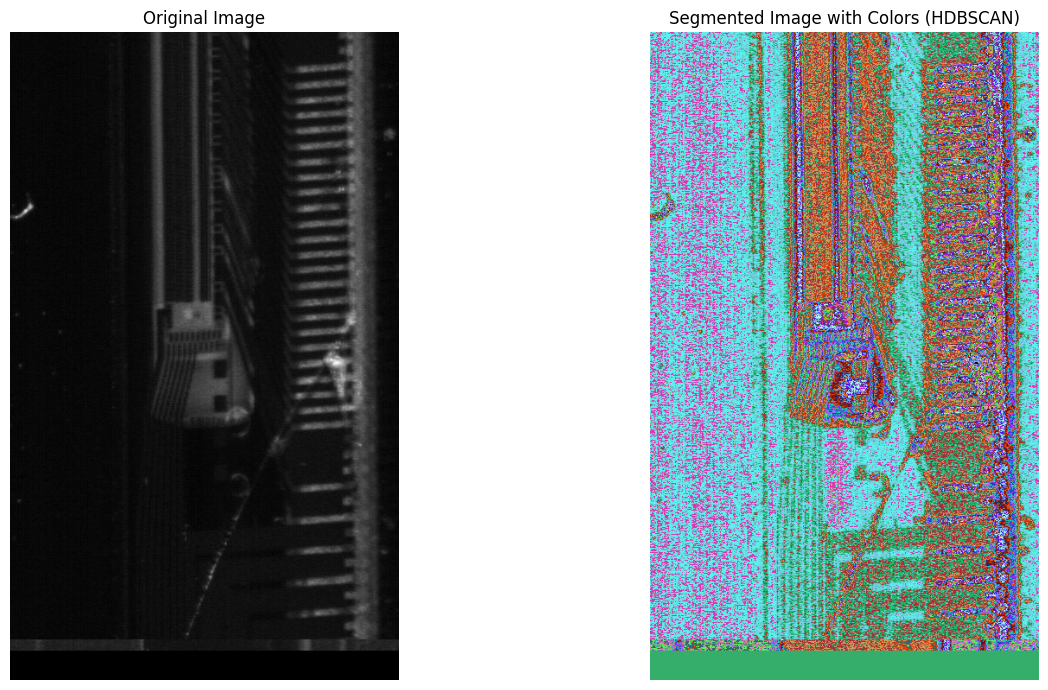

In [13]:
import numpy as np
import hdbscan
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# 將圖片轉換為二維數組，並對其進行標準化
pixel_values = image.reshape((-1, 1))
pixel_values = StandardScaler().fit_transform(pixel_values)

# 使用 HDBSCAN 進行分群
hdb = hdbscan.HDBSCAN(min_cluster_size=15, min_samples=5)
labels = hdb.fit_predict(pixel_values)

# 將分群結果重塑為圖像形狀
segmented_image = labels.reshape(image.shape)

# 創建顏色映射結果
unique_labels = np.unique(labels)
colors = np.random.randint(0, 256, size=(len(unique_labels), 3), dtype=np.uint8)

colored_segmented_image = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3), dtype=np.uint8)
for idx, label in enumerate(unique_labels):
    if label == -1:
        colored_segmented_image[segmented_image == label] = [0, 0, 0]  # 噪聲顯示為黑色
    else:
        colored_segmented_image[segmented_image == label] = colors[idx]

# 顯示原始圖片和分群結果
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Segmented Image with Colors (HDBSCAN)")
plt.imshow(colored_segmented_image)
plt.axis('off')
plt.tight_layout()
plt.show()


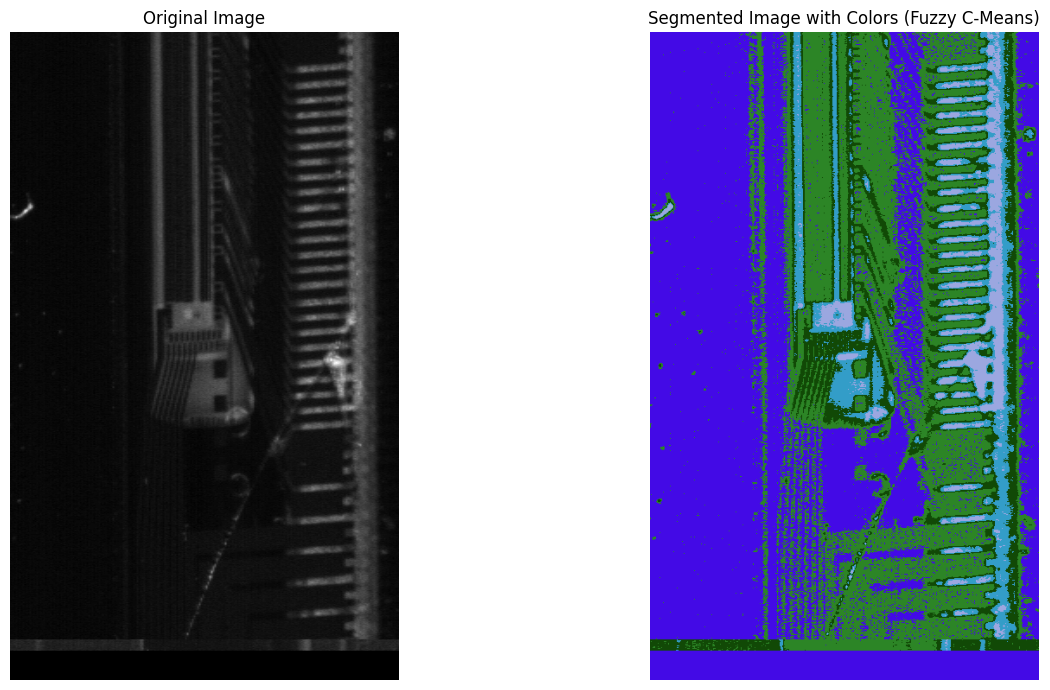

In [18]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

# 假設原始圖片是一個灰階圖像，將圖片轉換為一維數組
pixel_values = image.reshape((-1, 1))

# 定義要分的群數 (例如分成 5 群)
num_clusters = 5

# 使用 Fuzzy C-Means 進行分群
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(pixel_values.T, num_clusters, 2, error=0.005, maxiter=1000, init=None)

# 找到每個像素的最高隸屬度的索引
labels = np.argmax(u, axis=0)

# 將分群結果重塑為圖像形狀
segmented_image = labels.reshape(image.shape)

# 創建顏色映射結果
unique_labels = np.unique(labels)
colors = np.random.randint(0, 256, size=(num_clusters, 3), dtype=np.uint8)

colored_segmented_image = np.zeros((segmented_image.shape[0], segmented_image.shape[1], 3), dtype=np.uint8)
for idx, label in enumerate(unique_labels):
    colored_segmented_image[segmented_image == label] = colors[label]

# 顯示原始圖片和分群結果
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.title("Segmented Image with Colors (Fuzzy C-Means)")
plt.imshow(colored_segmented_image)
plt.axis('off')
plt.tight_layout()
plt.show()


In [17]:
!pip install scikit-fuzzy

     |████████████████████████████████| 920 kB 1.7 MB/s eta 0:00:01
You should consider upgrading via the '/Users/xieweizhe/Desktop/MacCode/Digital-Image-Processing/.venv/bin/python3 -m pip install --upgrade pip' command.
